Метод KNN классификации.
Создание пайплайна и применение подбор гиперпараметров по сетке. 

Задача:
При помощи ульразвукового локатора (Сонар - Sоund Navigation And Ranging) определить объект на воде или под водой. Набор данных содержить около 60 различных частот сонара, отправленных на известные объекты - камни и мины. 

Создать модель машинного обучения, которая может определить тип объекта - камень или мина - на основе ответа от сонаров на 60 различных частотах.

In [13]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [14]:
df = pd.read_csv(r"C:\Users\mmd28\OneDrive\Рабочий стол\Academic potfolio\Classical Machine Learning\Supervised learning\Classification\data\sonar.all-data.csv")

In [15]:
df.head(3)

,Freq_1,Freq_2,Freq_3,Freq_4,Freq_5,Freq_6,Freq_7,Freq_8,Freq_9,Freq_10,...,Freq_52,Freq_53,Freq_54,Freq_55,Freq_56,Freq_57,Freq_58,Freq_59,Freq_60,Label
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,R
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,R
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,R


Создадим тепловую карту для выявления коррелиции между откликами различных частот сонара.

<Axes: >

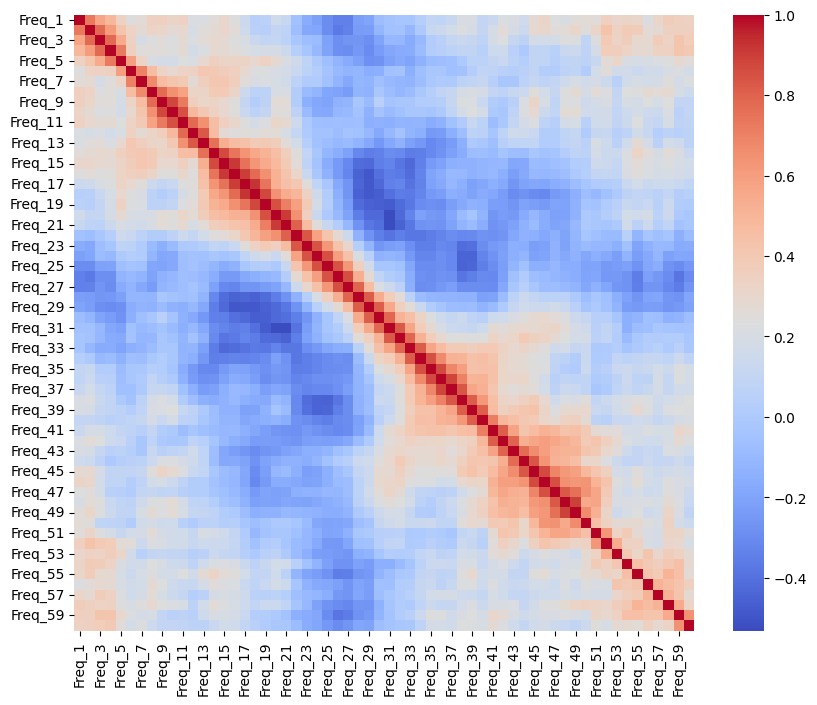

In [16]:
plt.figure(figsize=(10, 8), dpi=100)
sns.heatmap(df.corr(numeric_only=True), cmap='coolwarm')

По диагонали мы видим красные квадратики, потому что каждая частота идеально коррелирует сама с собой. Рядим с диагональю мы видим розовые пятна - это означает, что соседние частоты коррелируют между собой, так как они близкие друг с другом по значению. 

Посмотри на пять частот наиболее сильно коррелирующих с переменной. Мы ищем абсолютные значения.

Мы можем пометить целевую переменную с помощью значений 0 и 1 вместо R и M. Поместим ити значения в новый столбец.

In [17]:
df['Target'] = df['Label'].map({'R': 0, 'M': 1})

Выведем числовые значений корреляций. Выведем абсолютные значения и отсортируем их. Выведем только 6 наибольших значений (5 + значение target).

In [18]:
np.abs(df.corr(numeric_only=True)['Target']).sort_values().tail(6)

Freq_45    0.339406
Freq_10    0.341142
Freq_49    0.351312
Freq_12    0.392245
Freq_11    0.432855
Target     1.000000
Name: Target, dtype: float64

Разбиение на обучающий и тестовый наборы данных. Выделим на кросс-валидацию 90 % данных, а на тестовый набор для оценки модели - 10% данных. 

In [19]:
from sklearn.model_selection import train_test_split

In [20]:
X = df.drop(['Target', 'Label'], axis=1)
y = df['Label']

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

Создадим Pipeline с объектом scaler и моделью KNN

In [22]:
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

In [23]:
scaler = StandardScaler()

In [24]:
knn = KNeighborsClassifier()

Создадим объект, который будет указывать пайплайну порядок действий

In [25]:
operations = [('scaler', scaler), ('knn', knn)]

Создаем сам Pipeline, который сперва запустит масштабирование признаков (стандартизацию), а затем зупустит модель К-ближайших соседей.

In [26]:
pipe = Pipeline(operations)

С помощью пайплайна выполним поиск по сетке для различных значений "К". После выведим наилучшие параметры метода.

Создадим список для значений "К" от 1 до 30

In [27]:
k_values = list(range(1, 30))

Создадим набор параметров для поиска гиперпараметров по сетке

In [28]:
param_grid = {'knn__n_neighbors': k_values}

Создадим классификатор

In [29]:
full_cv_classifier = GridSearchCV(pipe, param_grid, cv=5, scoring='accuracy')

Обучим модель на тренировочных данных

In [30]:
full_cv_classifier.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('knn', KNeighborsClassifier())]),
             param_grid={'knn__n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11,
                                              12, 13, 14, 15, 16, 17, 18, 19,
                                              20, 21, 22, 23, 24, 25, 26, 27,
                                              28, 29]},
             scoring='accuracy')

Посмотрим получившиеся параметры

In [31]:
full_cv_classifier.best_estimator_.get_params()

{'memory': None,
 'steps': [('scaler', StandardScaler()),
  ('knn', KNeighborsClassifier(n_neighbors=1))],
 'verbose': False,
 'scaler': StandardScaler(),
 'knn': KNeighborsClassifier(n_neighbors=1),
 'scaler__copy': True,
 'scaler__with_mean': True,
 'scaler__with_std': True,
 'knn__algorithm': 'auto',
 'knn__leaf_size': 30,
 'knn__metric': 'minkowski',
 'knn__metric_params': None,
 'knn__n_jobs': None,
 'knn__n_neighbors': 1,
 'knn__p': 2,
 'knn__weights': 'uniform'}

Получилось, что наилучшее значение "К" = 1

Нарисуем график средних тестовых оценок (mean_test_score) для каждого 'K'

In [32]:
cv_results = pd.DataFrame(full_cv_classifier.cv_results_)

In [33]:
cv_results.head(3)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_knn__n_neighbors,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.006649,0.002535,0.080347,0.133052,1,{'knn__n_neighbors': 1},0.894737,0.710526,0.837838,0.918919,0.864865,0.845377,0.072755,1
1,0.004922,0.000850,0.014229,0.001328,2,{'knn__n_neighbors': 2},0.894737,0.684211,0.810811,0.702703,0.810811,0.780654,0.077732,2
2,0.004476,0.000711,0.012766,0.000640,3,{'knn__n_neighbors': 3},0.894737,0.684211,0.783784,0.729730,0.783784,0.775249,0.070403,3


In [34]:
cv_results['mean_test_score']

0     0.845377
1     0.780654
2     0.775249
3     0.759175
4     0.759317
5     0.748222
6     0.759459
7     0.716643
8     0.711380
9     0.684211
10    0.700427
11    0.684353
12    0.684495
13    0.679090
14    0.695306
15    0.689900
16    0.711380
17    0.700427
18    0.722048
19    0.679090
20    0.700711
21    0.695306
22    0.695306
23    0.684637
24    0.684780
25    0.679232
26    0.674111
27    0.657752
28    0.668563
Name: mean_test_score, dtype: float64

<Axes: >

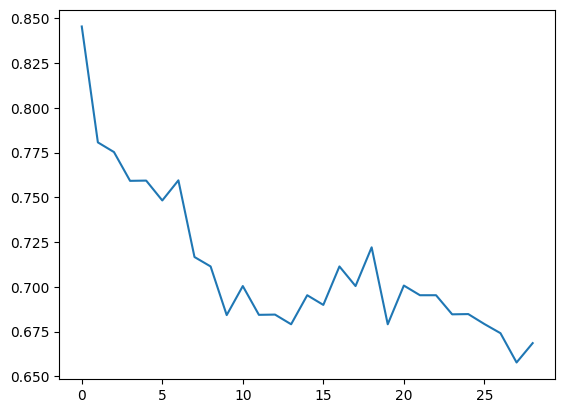

In [35]:
cv_results['mean_test_score'].plot()

Оценим работу модели. Выведем матрицу ошибок.

In [39]:
y_pred = full_cv_classifier.predict(X_test)

In [40]:
from sklearn.metrics import classification_report, confusion_matrix

In [41]:
confusion_matrix(y_test, y_pred)

array([[12,  1],
       [ 1,  7]])

Модель неправильно классифицированла всего 2 точки (1 + 1). При этом 1 ошибка показывает, что это False negative. Таким образом модель назвала камень, а это была мина. 

In [42]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           M       0.92      0.92      0.92        13
           R       0.88      0.88      0.88         8

    accuracy                           0.90        21
   macro avg       0.90      0.90      0.90        21
weighted avg       0.90      0.90      0.90        21

